In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

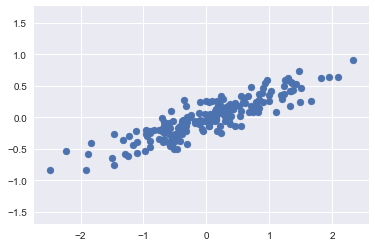

In [12]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


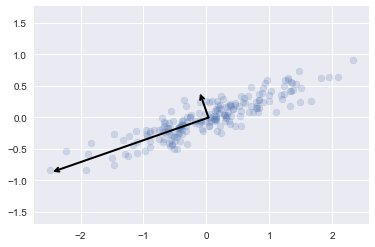

In [13]:
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    
plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length,vector in zip(pca.explained_variance_,pca.components_):
    v = vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal');

In [15]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ",X.shape)
print("transformed shape:",X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


(-2.78030489102931, 2.670533706929767, -1.0014180896959415, 1.0245529068552033)

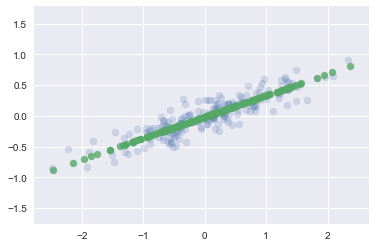

In [17]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal')

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [21]:
pca = PCA(2)  #从64维投影至二维
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


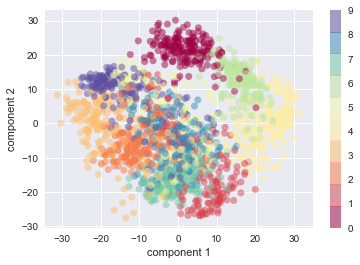

In [28]:
plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolor='none',alpha=0.5,
           cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0,0.5,'cumulative explained variance')

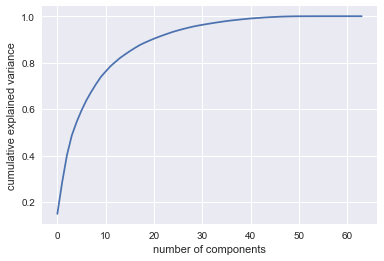

In [30]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

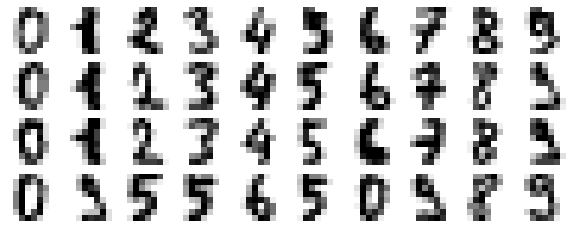

In [32]:
#用PCA作噪音过滤
#先画出无噪音输入数据
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[],'yticks':[]},
                           gridspec_kw=dict(hspace=0.1,wspace=0.2))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)

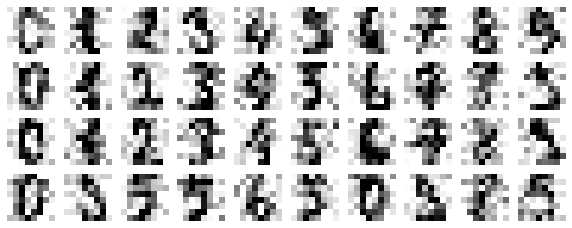

In [34]:
#添加一些随机噪音并创建一个噪音数据集，重新画图
np.random.seed(42)
noisy = np.random.normal(digits.data,4)
plot_digits(noisy)

In [36]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

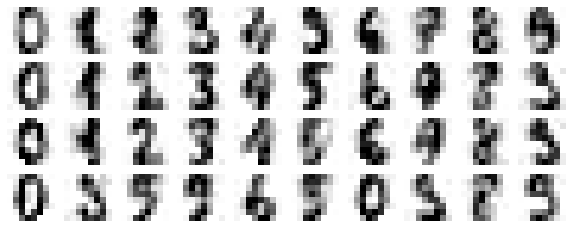

In [37]:
#利用逆变换重构过滤后的手写数字
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)